In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open("PopulationNoiseResults_growingEpochs1.json", 'r') as pn:
    data = {k:v for k,v in json.load(pn).items() if type(v) is not int and len(k.split('_')) == 3} # and int(k.split('_')[-1]) in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} # and k.split('_')[-1] in ['trial0', '0', '2', '4', '6', '8']}
#print(data.keys())
#print()
    
with open("PopulationNoiseResults_growingEpochs0.json", 'r') as pn:
    data.update({k:v for k,v in json.load(pn).items() if type(v) is not int and len(k.split('_')) == 3})
    
#print(data.keys())

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 1
df = pd.DataFrame()
stats = {}
stats_combined = {}
for t,d in data.items():
    stats[t] = {}
    acc = d["accs"]
    
    scores = list(acc.values())
    scores = np.vstack([np.array(s) for s in scores])[score_num]
    
    stats[t]["medians"] = np.median(scores)
    stats[t]["iqr"] = np.quantile(scores, 0.75) - np.quantile(scores, 0.25)
    data[t] = d
    
    d["train"] = d["accs"]["train"]
    d["val"] = d["accs"]["val"]
    
    d["population"] = int(t.split("trial")[-1].split('_')[0])
    d["epochs"] = int(t.split("trial")[-1].split('_')[1])
    
    stats[t]["population"] = d["population"]
    stats[t]["epochs"] = d["epochs"]
    
    stats_combined[t[:-2]] = stats_combined.get(t[:-2], {})
    stats_combined[t[:-2]]["population"] = d["population"]
    stats_combined[t[:-2]]["epochs"] = d["epochs"]
    stats_combined[t[:-2]]["accs"] = stats_combined[t[:-2]].get("accs", []) + list(scores)
    del d["accs"]
    del d["shape"]
    
    temp_df =  pd.DataFrame.from_dict(d, orient = "columns")
    df = pd.concat([df, temp_df], ignore_index = True)
    
for k,v in stats_combined.items():
    v["medians"] = np.median(v["accs"])
    v["iqr"] = np.quantile(v["accs"], 0.75) - np.quantile(v["accs"], 0.25)
    v["passes"] = v["epochs"] * max(v["population"],1)
    v["samples"] = len(v["accs"])
    del v["accs"]

In [3]:
#df = pd.DataFrame.from_dict(data, orient = "index")
df.head()
#df["epochs"].value_counts()

,train,val,population,epochs
0,0.814627,0.805208,4,1200
1,0.784505,0.787891,4,1200
2,0.822483,0.816146,4,1200
3,0.815755,0.812891,4,1200
4,0.829340,0.823828,4,1200


In [4]:
mdf = pd.melt(df,id_vars = "population", value_vars = ["train", "val"])
mdf.head()

,population,variable,value
0,4,train,0.814627
1,4,train,0.784505
2,4,train,0.822483
3,4,train,0.815755
4,4,train,0.829340


(0.6, 0.85)

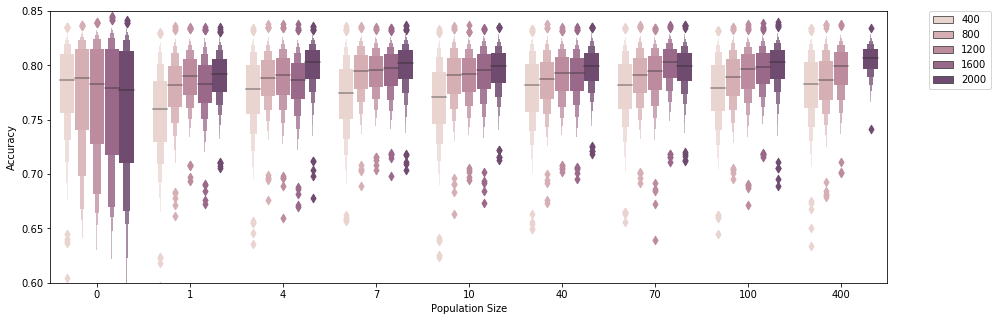

In [5]:
plt.figure(figsize = (15, 5))
#sns.boxenplot(x = "population", y = "value", hue = "variable", data = mdf)
sns.boxenplot(x = "population", y = "val", hue = "epochs", data = df, palette = sns.cubehelix_palette(5, dark = 0.35))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("Accuracy")
plt.xlabel("Population Size")
plt.ylim([0.6,0.85])

In [6]:
temp_df =  pd.DataFrame.from_dict(stats, orient = "index")
temp_df.sort_values(["population", "epochs"])

,medians,iqr,population,epochs
trial0_400_4,0.783333,0.055013,0,400
trial0_400_3,0.794206,0.049707,0,400
trial0_400_2,0.779948,0.057617,0,400
trial0_400_1,0.783268,0.051270,0,400
trial0_400_0,0.791276,0.054948,0,400
...,...,...,...,...
trial400_800_4,0.789128,0.032943,400,800
trial400_1200_0,0.803060,0.025098,400,1200
trial400_1200_1,0.789193,0.035807,400,1200
trial400_1200_2,0.803516,0.026562,400,1200


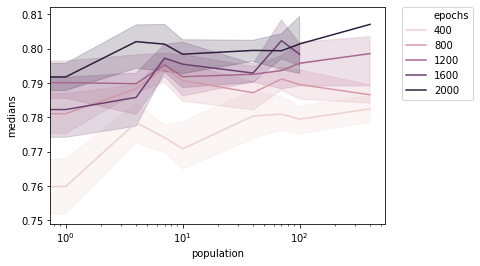

In [7]:
sns.lineplot(x = "population", y = "medians", data = temp_df, hue ="epochs", legend="full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")

(0.02, 0.06)

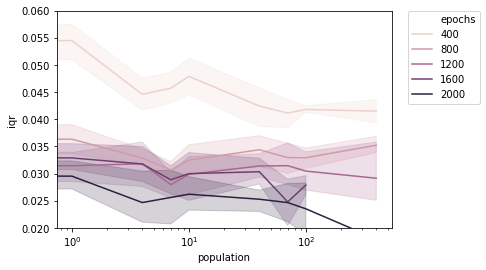

In [8]:
sns.lineplot(x = "population", y = "iqr", data = temp_df, hue ="epochs", legend="full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")
plt.ylim([0.02,0.06])

In [9]:
combo_df = pd.DataFrame.from_dict(stats_combined, orient = "index")
combo_df

,population,epochs,medians,iqr,passes,samples
trial4_1200,4,1200,0.791016,0.034538,4800,5000
trial4_1600,4,1600,0.786198,0.033984,6400,5000
trial4_2000,4,2000,0.803516,0.026042,8000,5000
trial7_400,7,400,0.774935,0.045964,2800,5000
trial7_800,7,800,0.794792,0.031152,5600,5000
trial7_1200,7,1200,0.795833,0.028385,8400,5000
trial7_1600,7,1600,0.797526,0.029557,11200,5000
trial0_400,0,400,0.786589,0.054167,400,5000
trial0_800,0,800,0.788411,0.075000,800,5000
trial0_1200,0,1200,0.783203,0.087565,1200,5000


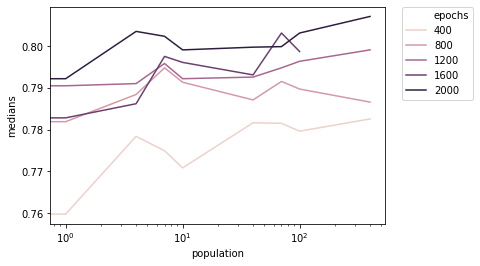

In [10]:
sns.lineplot(x="population", y = "medians", hue = "epochs", data = combo_df, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")

(0.02, 0.06)

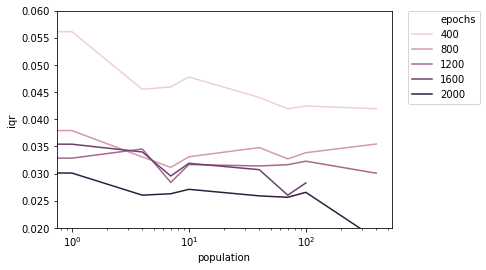

In [11]:
combo_df = pd.DataFrame.from_dict(stats_combined, orient = "index")
sns.lineplot(x="population", y = "iqr", hue = "epochs", data = combo_df, legend = "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")
plt.ylim([0.02,0.06])

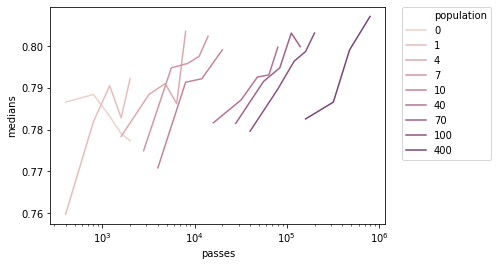

In [12]:
combo_df = pd.DataFrame.from_dict(stats_combined, orient = "index")
sns.lineplot(x="passes", y = "medians", hue = "population", data = combo_df, legend = "full", palette = sns.color_palette("ch:dark=0.35", 9))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")
#plt.ylim([0.02,0.06])

(0.02, 0.12)

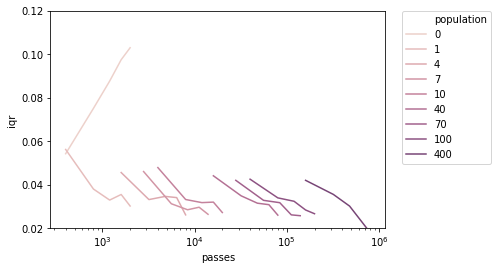

In [13]:
combo_df = pd.DataFrame.from_dict(stats_combined, orient = "index")
sns.lineplot(x="passes", y = "iqr", hue = "population", data = combo_df, legend = "full", palette = sns.color_palette("ch:dark=0.35", 9))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xscale("log")
plt.ylim([0.02, 0.12])